### Importing and Exploring

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import random
random.seed(123)

from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_tree
from collections import OrderedDict
import time

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Data Exploration

### Scaling

In [5]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [6]:
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

In [7]:
# Scaled Amount

scaled_amount = scaler_amount.fit_transform(df[['Amount']])
list_amount = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(list_amount)

In [8]:
# Scaled Time

scaled_time = scaler_time.fit_transform(df[['Time']])
list_time = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(list_time)

In [9]:
df = pd.concat([df, scaled_time.rename('Scaled_Time'), scaled_amount.rename('Scaled_Amount')], axis = 1)
df.drop(['Time', 'Amount'], axis = 1, inplace = True)
df = df.rename(columns={"Scaled_Time": "Time", "Scaled_Amount": "Amount"})
df = df[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class']]

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

    Kurtosis is a measure of the combined sizes of the two tails. It measures the amount of probability in tails.
    The value is often compared to the kurtosis of the normal distribution, which is equal to 3.

In [12]:
for i in range(30):
    col_name = df.columns[i]
    t, p_val = stats.ttest_ind(df.loc[ df['Class']==0, col_name], df.loc[ df['Class']==1, col_name],equal_var=False)  
    skewness = df.loc[:,col_name].skew()
    kurtosis = stats.kurtosis(df.loc[:,col_name])
    print('Variable: {:15s}'.format(col_name),end='')    
    print('p-value: {:6.3f}  skewness: {:6.3f}  kurtosis: {:6.3f}'.format(p_val, skewness, kurtosis))

Variable: Time           p-value:  0.000  skewness: -0.036  kurtosis: -1.294
Variable: V1             p-value:  0.000  skewness: -3.281  kurtosis: 32.486
Variable: V2             p-value:  0.000  skewness: -4.625  kurtosis: 95.771
Variable: V3             p-value:  0.000  skewness: -2.240  kurtosis: 26.619
Variable: V4             p-value:  0.000  skewness:  0.676  kurtosis:  2.635
Variable: V5             p-value:  0.000  skewness: -2.426  kurtosis: 206.901
Variable: V6             p-value:  0.000  skewness:  1.827  kurtosis: 42.642
Variable: V7             p-value:  0.000  skewness:  2.554  kurtosis: 405.600
Variable: V8             p-value:  0.063  skewness: -8.522  kurtosis: 220.583
Variable: V9             p-value:  0.000  skewness:  0.555  kurtosis:  3.731
Variable: V10            p-value:  0.000  skewness:  1.187  kurtosis: 31.988
Variable: V11            p-value:  0.000  skewness:  0.357  kurtosis:  1.634
Variable: V12            p-value:  0.000  skewness: -2.278  kurtosis: 20.

## Splitting into train, validation and test

    train 40%, validation 30%, test 30%

In [13]:
# We are interested in Class column

Class = df['Class'].values
Class

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# Shuffling

all_Ind = np.arange(len(Class))
np.random.shuffle(all_Ind)

In [15]:
# Splitting

# Numerical length

numerical_Train = int(round(0.4 * len(Class)))
numerical_Validation = int(round(0.3 * len(Class)))
numerical_Test = len(Class) - numerical_Train - numerical_Validation

In [16]:
Train = all_Ind[:numerical_Train]
Validation = all_Ind[numerical_Train:(numerical_Train+numerical_Validation)]
Test =  all_Ind[(numerical_Train+numerical_Validation):]

In [17]:
# X

train_X = df.iloc[Train,:30]
validation_X = df.iloc[Validation,:30]
test_X  = df.iloc[Test,:30]

In [18]:
# y

train_y = Class[Train]
validation_y = Class[Validation]
test_y = Class[Test]

## Preparing the Fixed Parameters

In [19]:
# Creating matrices

fixed_train = xgb.DMatrix(train_X, label = train_y)
fixed_validation = xgb.DMatrix(validation_X, label = validation_y)
fixed_test = xgb.DMatrix(test_X, label = test_y)

# Fixed parameters

number_of_rounds = 20 # number of boosting iterations

parameters = {'silent':1,
             'min_child_weight':1,
             'objective':'binary:logistic',
             'eval_metric':'auc',
             'seed' : 1234}

## Preparign the Variable Parameters

    maximum tree depth: 5 steps, levels from 5 to 25
    subsample: steps of 0.1, values from 0.5 to 1.0
    colsample by tree: the same as in subsample
    leaning rate: values from 0.01 to 0.4
    minimum loss function: 5 steps, values from 0.00 to 0.2
    relative weight of positive/negative: random small and big values

In [20]:
# Ratio

negative_to_positive = sum(train_y == 0) / sum(train_y == 1)
print('Ratio of negative to positive instances: {:6.1f}'.format(negative_to_positive))

# Parameters

parameters_dict = OrderedDict()

parameters_dict['max_depth'] = [5, 10, 15, 20, 25]
parameters_dict['subsample'] =[0.5, 0.6, 0.7, 0.8, 0.9, 1]
parameters_dict['colsample_bytree'] = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
parameters_dict['eta'] = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
parameters_dict['gamma'] = [0.00, 0.05, 0.1, 0.15, 0.2]
parameters_dict['scale_pos_weight'] = [30, 40, 50, 300, 400, 500, 600, 700]

lengths = [len(lst) for lst in parameters_dict.values()]

combinations = 1
for i in range(len(lengths)):
    combinations *= lengths[i]
print('Total number of combinations: {:16d}'.format(combinations))  

maximum_iterations = 100

columns = [*parameters_dict.keys()] + ['F-Score','Best F-Score']

# Saving the results

results = pd.DataFrame(index = range(maximum_iterations), columns = columns) 

Ratio of negative to positive instances:  589.3
Total number of combinations:            43200


## Performance and Training 

    defining a function for performance measurement, precision and recall

In [21]:
def performance(predictions, labels, confusion_matrix = False):
    
    positive = sum(labels == 1)
    negative = len(labels) - positive
    
    predicted_positive =sum(1 for i in range(len(predictions)) if (predictions[i]>=0.5))
    predicted_negative =sum(1 for i in range(len(predictions)) if (predictions[i]>=0.5) & (labels[i]==1))
    
    false_positive = predicted_positive - predicted_negative
    false_negative = positive - negative
    true_negative = negative - false_positive
      
    precision = predicted_negative / predicted_positive
    recall = predicted_negative / positive
    
    score = 2 * precision * recall / (precision + recall) 
    
    if confusion_matrix:
        print('\nconfusion matrix')
        print('----------------')
        print( 'tn:{:6d} fp:{:6d}'.format(true_negative, false_positive))
        print( 'fn:{:6d} tp:{:6d}'.format(false_negative, predicted_negative))
    
    return(score)

    defining a function for training with given fixed and variable parameters

In [22]:
def train(current_choice, parameters, train_X, train_S, train_y, valid_X, valid_S, valid_y, confusion_matrix = False):
    
    print('Parameters:')
    for (key,value) in current_choice.items():
        print(key,': ',value,' ',end='')
        parameters[key]=value
    print('\n')    

    model = xgb.train(parameters, train_X, num_boost_round = number_of_rounds)  
    
    predictions = model.predict(valid_X)
    labels = valid_X.get_label()
      
    score = performance(predictions, labels, confusion_matrix)
    
    return(score, model)    

## Getting the combinations

    defining a function choice with already assigned parameters or with random ones

In [23]:
def choice(current_parameters = None):
    
    if current_parameters:
        
        choose_parameter_name, current_value = random.choice(list(current_choice.items()))
       
        all_values =  list(parameters_dict[choose_parameter_name])
        current_index = all_values.index(current_value)
        
        if current_index == 0:
            next_index = 1
        elif current_index == len(all_values) - 1:
            next_index = len(all_values) - 2
        else:
            direction = np.random.choice([-1, 1])
            next_index = current_index + direction

        next_parameters = dict((k,v) for k,v in current_parameters.items())
        next_parameters[choose_parameter_name] = all_values[next_index]
        print('selected move: {:10s}: from {:6.2f} to {:6.2f}'.
              format(choose_parameter_name, current_value, all_values[next_index]))
    else:
        next_parameters = dict()
        for i in range(len(parameters_dict)):
            key = [*parameters_dict.keys()][i] 
            values = [*parameters_dict.values()][i]
            next_parameters[key] = np.random.choice(values)
    return(next_parameters) 

## Iterations

    time should be defined

In [24]:
t0 = time.clock()

T = 0.40

best_parameters = {}

best_score = -1. 
last_score = -1. 
last_choice = None
weights = list(map(lambda x: 10 ** x, [0, 1, 2, 3, 4]))
hash_values = set()

for iter in range(maximum_iterations):
    print('\nIteration = {:5d}  T = {:12.6f}'.format(iter,T))
    
    while True:
        current_choice = choice(last_choice)
         
        indices=[parameters_dict[name].index(current_choice[name]) for name in sorted([*parameters_dict.keys()])]

        hash_value = sum([i * j for (i, j) in zip(weights, indices)])
        if hash_value in hash_values:
            print('\nCombination revisited - searching again')
            
        else:
            hash_values.add(hash_value)
            break
    
    
    score, model = train(current_choice, parameters, fixed_train, 'train', train_y, fixed_validation, 'valid', validation_y)
    
    results.loc[iter,[*current_choice.keys()]] = list(current_choice.values())
    
    print('    F-Score: {:6.2f}  previous: {:6.2f}  best so far: {:6.2f}'.format(score, last_score, best_score))
 
    if score > last_score:
        print('    Local improvement')
        
        last_score = score
        last_choice = current_choice
        
        if score > best_score:
            
            best_score = score
            print('    Global improvement - best score updated')
            for (key,value) in last_choice.items():
                best_parameters[key] = value

    else:
        
        random_f = random.random()
        difference = score - last_score
        threshold = np.exp(1.3 * difference / T)
        if random_f <= threshold:
            print('    Worse result. Score change: {:8.4f}  threshold: {:6.4f}  random number: {:6.4f} -> accepted'.
                  format(difference, threshold, random_f))
            last_score = score
            last_choice = current_choice
 
        else:
            print('    Worse result. Score change: {:8.4f}  threshold: {:6.4f}  random number: {:6.4f} -> rejected'.
                 format(difference, threshold, random_f))
    results.loc[iter,'Score'] = score
    results.loc[iter,'Best Score'] = best_score
    if iter % 5 == 0: T = 0.85 * T  
        
print('\n{:6.1f} minutes process time\n'.format((time.clock() - t0)/60))    

print('Best variable parameters found:\n')
print(best_parameters)


Iteration =     0  T =     0.400000
Parameters:
gamma :  0.05  max_depth :  5  subsample :  0.9  eta :  0.3  colsample_bytree :  0.8  scale_pos_weight :  700  

    F-Score:   0.58  previous:  -1.00  best so far:  -1.00
    Local improvement
    Global improvement - best score updated

Iteration =     1  T =     0.340000
selected move: gamma     : from   0.05 to   0.10
Parameters:
gamma :  0.1  max_depth :  5  subsample :  0.9  colsample_bytree :  0.8  eta :  0.3  scale_pos_weight :  700  

    F-Score:   0.58  previous:   0.58  best so far:   0.58
    Worse result. Score change:   0.0000  threshold: 1.0000  random number: 0.2677 -> accepted

Iteration =     2  T =     0.340000
selected move: colsample_bytree: from   0.80 to   0.90
Parameters:
gamma :  0.1  max_depth :  5  subsample :  0.9  eta :  0.3  colsample_bytree :  0.9  scale_pos_weight :  700  

    F-Score:   0.60  previous:   0.58  best so far:   0.58
    Local improvement
    Global improvement - best score updated

Iterati

    F-Score:   0.84  previous:   0.83  best so far:   0.84
    Local improvement
    Global improvement - best score updated

Iteration =    21  T =     0.177482
selected move: scale_pos_weight: from 600.00 to 500.00
Parameters:
gamma :  0.15  max_depth :  20  subsample :  0.9  colsample_bytree :  0.6  eta :  0.3  scale_pos_weight :  500  

    F-Score:   0.83  previous:   0.84  best so far:   0.84
    Worse result. Score change:  -0.0136  threshold: 0.9051  random number: 0.5271 -> accepted

Iteration =    22  T =     0.177482
selected move: subsample : from   0.90 to   0.80

Combination revisited - searching again
selected move: gamma     : from   0.15 to   0.10
Parameters:
gamma :  0.1  max_depth :  20  subsample :  0.9  eta :  0.3  colsample_bytree :  0.6  scale_pos_weight :  500  

    F-Score:   0.83  previous:   0.83  best so far:   0.84
    Worse result. Score change:   0.0000  threshold: 1.0000  random number: 0.3982 -> accepted

Iteration =    23  T =     0.177482
selected mo

    F-Score:   0.84  previous:   0.84  best so far:   0.85
    Local improvement

Iteration =    43  T =     0.092647
selected move: colsample_bytree: from   0.70 to   0.80
Parameters:
gamma :  0.0  max_depth :  25  subsample :  0.9  colsample_bytree :  0.8  eta :  0.2  scale_pos_weight :  50  

    F-Score:   0.86  previous:   0.84  best so far:   0.85
    Local improvement
    Global improvement - best score updated

Iteration =    44  T =     0.092647
selected move: eta       : from   0.20 to   0.30
Parameters:
gamma :  0.0  max_depth :  25  subsample :  0.9  eta :  0.3  colsample_bytree :  0.8  scale_pos_weight :  50  

    F-Score:   0.86  previous:   0.86  best so far:   0.86
    Local improvement
    Global improvement - best score updated

Iteration =    45  T =     0.092647
selected move: scale_pos_weight: from  50.00 to  40.00
Parameters:
gamma :  0.0  max_depth :  25  subsample :  0.9  colsample_bytree :  0.8  eta :  0.3  scale_pos_weight :  40  

    F-Score:   0.85  previo

    F-Score:   0.84  previous:   0.85  best so far:   0.86
    Worse result. Score change:  -0.0117  threshold: 0.7301  random number: 0.3348 -> accepted

Iteration =    66  T =     0.041108
selected move: subsample : from   0.90 to   0.80

Combination revisited - searching again
selected move: gamma     : from   0.10 to   0.05
Parameters:
gamma :  0.05  max_depth :  20  subsample :  0.9  eta :  0.2  colsample_bytree :  0.5  scale_pos_weight :  50  

    F-Score:   0.84  previous:   0.84  best so far:   0.86
    Worse result. Score change:   0.0000  threshold: 1.0000  random number: 0.6391 -> accepted

Iteration =    67  T =     0.041108
selected move: max_depth : from  20.00 to  15.00
Parameters:
gamma :  0.05  max_depth :  15  subsample :  0.9  colsample_bytree :  0.5  eta :  0.2  scale_pos_weight :  50  

    F-Score:   0.84  previous:   0.84  best so far:   0.86
    Worse result. Score change:   0.0000  threshold: 1.0000  random number: 0.8839 -> accepted

Iteration =    68  T =   

    F-Score:   0.83  previous:   0.83  best so far:   0.86
    Worse result. Score change:  -0.0057  threshold: 0.7090  random number: 0.4511 -> accepted

Iteration =    89  T =     0.021459
selected move: eta       : from   0.05 to   0.10
Parameters:
gamma :  0.15  max_depth :  20  subsample :  0.9  colsample_bytree :  0.8  eta :  0.1  scale_pos_weight :  500  

    F-Score:   0.84  previous:   0.83  best so far:   0.86
    Local improvement

Iteration =    90  T =     0.021459
selected move: gamma     : from   0.15 to   0.10
Parameters:
gamma :  0.1  max_depth :  20  subsample :  0.9  eta :  0.1  colsample_bytree :  0.8  scale_pos_weight :  500  

    F-Score:   0.84  previous:   0.84  best so far:   0.86
    Worse result. Score change:   0.0000  threshold: 1.0000  random number: 0.1586 -> accepted

Iteration =    91  T =     0.018240
selected move: subsample : from   0.90 to   0.80

Combination revisited - searching again
selected move: eta       : from   0.10 to   0.05
Parameters:


In [25]:
print('\nBest parameters found:\n')  
print(best_parameters)

print('\nEvaluation on the test dataset\n')  

best_score, best_model = train(best_parameters, parameters, fixed_train, 'train', train_y, fixed_test, 'test', test_y, confusion_matrix = True)


print('\nScore on the test dataset: {:6.2f}'.format(best_score))


Best parameters found:

{'gamma': 0.1, 'max_depth': 20, 'subsample': 0.90000000000000002, 'colsample_bytree': 0.8, 'eta': 0.2, 'scale_pos_weight': 50}

Evaluation on the test dataset

Parameters:
gamma :  0.1  max_depth :  20  subsample :  0.9  colsample_bytree :  0.8  eta :  0.2  scale_pos_weight :  50  


confusion matrix
----------------
tn: 85275 fp:    15
fn:-85138 tp:   131

Score on the test dataset:   0.88


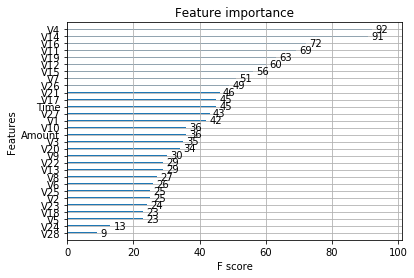

In [35]:
p = xgb.plot_importance(best_model) 
plt.show()